---
title: "ABC.14: Single Cell Proteomics Downstream Analysis"
authors: 
  - name: "Samuele Soraggi"
    role: "Editing and adapting"
  - name: "Laurent Gatto"
    role: "Original Creator"
  - name: "Cristophe Vanderaa"
    role: "Original Creator"
image: ../img/news/SCProteomics.png
date: 2025-03-13
categories: [Single Cell Proteomics, SCP, Mass Spectrometry, QFeatures, Data Formats]
description: "Data format and analysis workflow for Single Cell Proteomics in R"
eval: false
bibliography: 2025-03-13-ABC14/scp.bib
---

# Slides

Today's slides with topic presentation for Single Cell Proteomics downstream analysis with SC proteomics data obtained through Mass Spectrometry. 

&nbsp;

<p align="center">

<a href="https://abc.au.dk/documentation/slides/20250227-ABC13.zip" style="background-color: #4266A1; color: #FFFFFF; padding: 30px 20px; text-decoration: none; border-radius: 5px;"> Download Slides </a>

</p>

&nbsp;

# Tutorial

This tutorial is extracted from multiple vignettes of the `R` package `scp` and `QFeatures`. The `scp` package is a collection of tools for the analysis of single-cell proteomics data, and the `QFeatures` package is a collection of tools for the analysis of quantitative features in mass spectrometry-based proteomics data.

The original authors of the code are Laurent Gatto and Cristophe Vanderaa, which we edited to suit the tutorial format. The code is licensed as per the authors' license (see bottom of this page).

:::{.callout-note title="Learning Objectives"}
- Understand the `QFeatures` class and its structure
- Learn how to load and manipulate `QFeatures` objects
- Learn how to visualize `QFeatures` objects
- Preprocess features and cells single-cell proteomics data
- Perform operations on single-cell proteomics data

:::

## How to run the tutorial

### From your computer

You can run this tutorial on your laptop by installing the required packages `scp`, `dplyr` and `ggplot2`.

### With pixi on the cluster

You can also run the tutorial from `Rstudio` on GenomeDK, but only if you use the command line on the virtual desktop at `desktop.genome.au.dk`. First, log into the virtual desktop by filling in name and password for GenomeDK at the webpage `desktop.genome.au.dk`.

![](sharedImages/GDKDesktopLogin.png){width=400px fig-align=center}

Then, use the file browser (red circle) to navigate into a project folder where you want to work. Create an empty folder for the tutorial called ABC14 and open it. You can create a folder with the right-click menu (green circle).

![](sharedImages/GDKDesktopRightClick.png){width=800px fig-align=center}

Once you are in the new folder, use the right-click menu to create an empty document. Rename it `pixi.toml`, open it, and paste the code block below. Save the file and close it.

```toml
[project]
authors = ["SamueleSoraggi <samuele@birc.au.dk>"]
channels = ["conda-forge", "bioconda"]
name = "ABC14-SCProteomics"
platforms = ["linux-64"]
version = "0.1.0"

[tasks]

[dependencies]
jupyterlab = ">=4.3.5,<5"
rstudio-desktop = ">=2024.4.2,<2025"
bioconductor-scp = ">=1.16.0,<2"
r-ggplot2 = ">=3.5.1,<4"
r-dplyr = ">=1.1.4,<2"
r-patchwork = ">=1.3.0,<2"
bioconductor-singlecellexperiment = ">=1.28.0,<2"
r-irkernel = ">=1.3.2,<2"
bioconductor-genomeinfodb = ">=1.42.0,<2"
bioconductor-genomeinfodbdata = ">=1.2.13,<2"
bioconductor-impute = ">=1.80.0,<2"
pip = ">=25.0.1,<26"
bioconductor-sva = ">=3.54.0,<4"
bioconductor-scater = ">=1.34.0,<2"
```

Use the right-click menu again and choose `Open terminal here`. A terminal already logged into GenomeDK will open.

![](sharedImages/GDKDesktopCLI.png){width=300px fig-align=center}

If you do not have `pixi installed`, follow the few steps in the hidden box below, otherwise skip to the next steps.

:::{.callout-tip title="Install pixi" collapse="true"}
Run the installation script to install the software. There are some informative messages during the installation.

```{.bash}
curl -fsSL https://pixi.sh/install.sh | bash
```

When you are done, you need a little bit of configuration. You can run the following command to configure `pixi` (run them only once, they are not needed again):

```{.bash}
echo PATH="$PATH:$HOME/.pixi/bin" >> ~/.bashrc
echo 'eval "$(pixi completion --shell bash)"'  >> ~/.bashrc
source ~/.bashrc
```

Now you are ready to move on in the tutorial!

:::

In the terminal, start a new interactive job with a command like the one below 

```{.bash}
srun --mem=16g --cores=2 --time=02:00:00 --account=PROJECT --pty /bin/bash
```
Choose the amount of memory, cores and hours of usage you need. You also need a project name to write instead of `--account=PROJECT`. If you have no projects available, simply delete that option.

Once the waiting time for the interactive job is finished, use the command `pixi run rstudio`. The packages will be installed and `Rstudio` will open!

:::{.callout-warning}
One you have opened `Rstudio`, you also need to manually install some extra bioconductor packages using the `R` console:

```{.R}
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GenomeInfoDbData")
```

:::

### With conda on the cluster

Repeat all the steps described above until the creation of the `pixi.toml` file. Instead, create a `environment.yml` file with the following content:

```yaml
channels:
    - conda-forge
    - bioconda
dependencies:
    - jupyterlab >=4.3.5,<5
    - rstudio-desktop >=2024.4.2,<2025
    - bioconductor-scp >=1.16.0,<2
    - r-ggplot2 >=3.5.1,<4
    - r-dplyr >=1.1.4,<2
    - r-patchwork >=1.3.0,<2
    - bioconductor-singlecellexperiment >=1.28.0,<2
    - r-irkernel >=1.3.2,<2
    - bioconductor-genomeinfodb >=1.42.0,<2
    - bioconductor-genomeinfodbdata >=1.2.13,<2
    - bioconductor-impute >=1.80.0,<2
    - pip >=25.0.1,<26
    - bioconductor-sva >=3.54.0,<4
    - bioconductor-scater >=1.34.0,<2
```

Use the right-click menu again and choose `Open terminal here`. A terminal already logged into GenomeDK will open.

If you do not have `conda` installed, follow the few steps in the hidden box below, otherwise skip to the next steps.

:::{.callout-tip title="Install conda" collapse="true"}
Run the installation script to install the software. There are some informative messages during the installation. You might need to say `yes` a few times

```{.bash}
wget https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-Linux-x86_64.sh -O miniforge.sh
chmod +x miniforge.sh
bash miniforge.sh -b
~/miniforge3/bin/conda init bash
source ~/.bashrc
```

When you are done, you need a little bit of configuration. You can run the following command to configure `conda` (run them only once, they are not needed again):

```{.bash}
conda config --append channels conda-forge
conda config --append channels bioconda
conda config --set channel_priority strict
conda config --set auto_activate_base false
source ~/.bashrc
```

Finally, install a package to accellerate `conda`. This is optional but recommended:

```{.bash}
conda install -n base --yes conda-libmamba-solver
conda config --set solver libmamba
```

Now you are ready to move on in the tutorial!

:::


In the terminal, create a new conda named `ABC14` environment with the command below. Be patient because it takes some  minutes:

```{.bash}
conda env create -f environment.yml -n ABC14
```

Then start a new interactive job with a command like the one below 

```{.bash}
srun --mem=16g --cores=2 --time=02:00:00 --account=PROJECT --pty /bin/bash
```

Choose the amount of memory, cores and hours of usage you need. You also need a project name to write instead of `--account=PROJECT`. If you have no projects available, simply delete that option.

Once the waiting time for the interactive job is finished, use the command `conda activate ABC14` to make all installed packages available. Then use the command `rstudio` to open `Rstudio`!

:::{.callout-warning}
One you have opened `Rstudio`, you also need to manually install some extra bioconductor packages using the `R` console:

```{.R}
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GenomeInfoDbData")
```
:::

# The `QFeatures` class

The `QFeatures` class (Gatto and Vanderaa (2023)) is based on the
`MultiAssayExperiment` class that holds a collection of
`SummarizedExperiment` (or other classes that inherits from it) objects
termed **assays**. The assays in a `QFeatures` object have a
hierarchical relation: proteins are composed of peptides, themselves
produced by spectra, as depicted in figure below.

![](https://rformassspectrometry.github.io/QFeatures/articles/QFeatures_files/figure-html/featuresplot-1.png)

A more technical representation is shown below, highlighting that each
assay is a `SummarizedExperiment` (containing the quantitative data, row
and column annotations for each individual assay), as well as a global
sample annotation table, that annotates cells across all assays.

![](https://lgatto.github.io/QFeaturesScpWorkshop2021/articles/figs/SCP_framework.png)

Those links are stored as part as the `QFeatures` object and connect the
assays together. We load an example dataset from the `scp` package that
is formatted as an `QFeatures` object and plot those connection.

Loading required package: QFeatures

Loading required package: MultiAssayExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs,

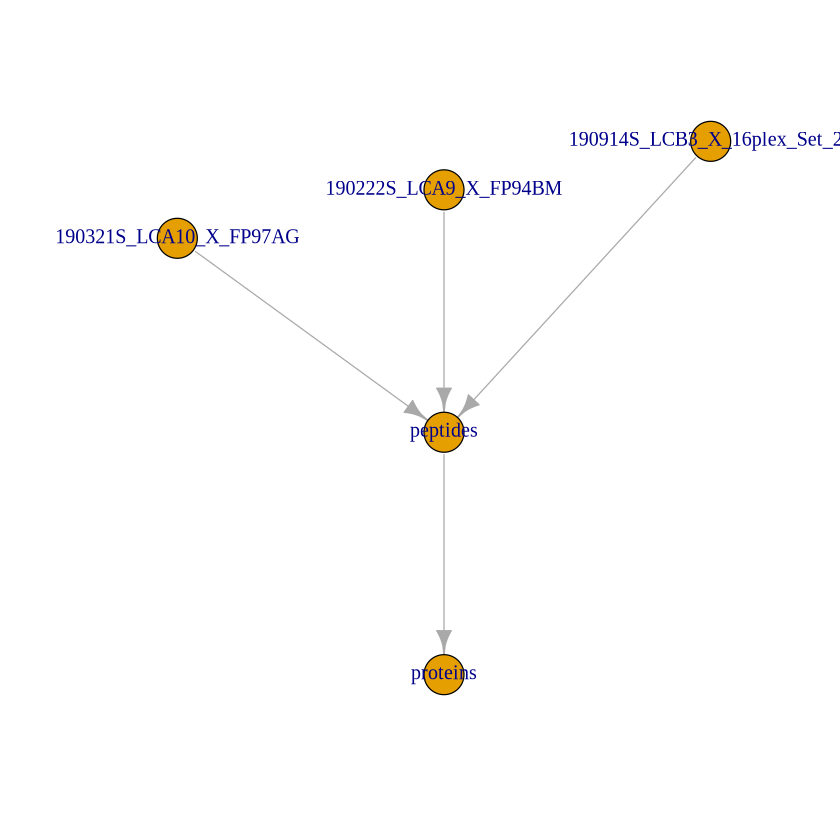

In [ ]:
#| output: false
library(scp)
data("scp1")
plot(scp1)

# Accessing the data

The `QFeatures` class contains all the available and metadata. We here
show how to retrieve those different pieces of information.

## Quantitative data

The quantitative data, stored as matrix-like objects, can be accessed
using the `assay` function. For example, we here extract the
quantitative data for the first MS batch (and show a subset of it):

In [2]:
assay(scp1, "190321S_LCA10_X_FP97AG")[1:5, ]

,190321S_LCA10_X_FP97AG_RI1,190321S_LCA10_X_FP97AG_RI2,190321S_LCA10_X_FP97AG_RI3,190321S_LCA10_X_FP97AG_RI4,190321S_LCA10_X_FP97AG_RI5,190321S_LCA10_X_FP97AG_RI6,190321S_LCA10_X_FP97AG_RI7,190321S_LCA10_X_FP97AG_RI8,190321S_LCA10_X_FP97AG_RI9,190321S_LCA10_X_FP97AG_RI10,190321S_LCA10_X_FP97AG_RI11
PSM3773,57895,603.73,2787.9,757.17,862.08,1118.80,640.10,1446.10,968.49,648.56,742.53
PSM9078,64889,1481.30,4891.6,597.53,1140.30,1300.10,1092.50,1309.40,1538.40,1014.50,1062.80
PSM9858,58993,489.85,2899.4,882.37,296.60,977.15,498.60,1437.90,857.40,888.01,768.61
PSM11744,75711,539.02,7292.7,357.90,1091.30,736.87,712.74,590.75,15623.00,298.60,481.38
PSM21752,0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Note that you can retrieve the list of available assays in a `QFeatures`
object using the `names()` function.

In [3]:
names(scp1)

[1] "190321S_LCA10_X_FP97AG"       "190222S_LCA9_X_FP94BM"       
[3] "190914S_LCB3_X_16plex_Set_21" "peptides"                    
[5] "proteins"

## Feature metadata

For each individual assay, there is feature metadata available. We
extract the list of metadata tables by using `rowData()` on the
`QFeatures` object.

In [4]:
rowData(scp1)

DataFrameList of length 5
names(5): 190321S_LCA10_X_FP97AG 190222S_LCA9_X_FP94BM 190914S_LCB3_X_16plex_Set_21 peptides proteins

In [5]:
rowData(scp1)[["proteins"]]

DataFrame with 292 rows and 9 columns
                                           protein Match.time.difference
                                       <character>             <logical>
A1A519                                      A1A519                    NA
A5D8V6                                      A5D8V6                    NA
A5PLK6                                      A5PLK6                    NA
A5PLL1                                      A5PLL1                    NA
A6NC97                                      A6NC97                    NA
...                                            ...                   ...
REV__CON__ENSEMBL:ENSBTAP00000038253 REV__CON__...                    NA
REV__CON__P06868                     REV__CON__...                    NA
REV__CON__Q05443                     REV__CON__...                    NA
REV__CON__Q32PI4                     REV__CON__...                    NA
REV__CON__Q3MHN5                     REV__CON__...                    NA
             

You can also retrieve the names of each `rowData` column for all assays
with `rowDataNames`.

In [6]:
rowDataNames(scp1)

CharacterList of length 5
[["190321S_LCA10_X_FP97AG"]] uid Sequence ... peptide Leading.razor.protein
[["190222S_LCA9_X_FP94BM"]] uid Sequence ... peptide Leading.razor.protein
[["190914S_LCB3_X_16plex_Set_21"]] uid Sequence ... Leading.razor.protein
[["peptides"]] Sequence Length Modifications ... .n Leading.razor.protein
[["proteins"]] protein Match.time.difference ... Potential.contaminant .n

You can also get the `rowData` from different assays in a single table
using the `rbindRowData` function. It will keep the common `rowData`
variables to all selected assays (provided through `i`).

In [7]:
rbindRowData(scp1, i = 1:5)

DataFrame with 1388 rows and 10 columns
             assay       rowname       protein Match.time.difference
       <character>   <character>   <character>             <logical>
1    190321S_LC...       PSM3773        P61981                    NA
2    190321S_LC...       PSM9078        Q8WVN8                    NA
3    190321S_LC...       PSM9858        P55084                    NA
4    190321S_LC...      PSM11744        P19099                    NA
5    190321S_LC...      PSM21752        P52952                    NA
...            ...           ...           ...                   ...
1384      proteins REV__CON__... REV__CON__...                    NA
1385      proteins REV__CON__... REV__CON__...                    NA
1386      proteins REV__CON__... REV__CON__...                    NA
1387      proteins REV__CON__... REV__CON__...                    NA
1388      proteins REV__CON__... REV__CON__...                    NA
     Match.m.z.difference Match.q.value Match.score Reporter.PI

## Sample metadata

The sample metadata is retrieved using `colData` on the `QFeatures`
object.

In [8]:
colData(scp1)

DataFrame with 38 rows and 7 columns
                                            Set     Channel SampleAnnotation
                                    <character> <character>      <character>
190222S_LCA9_X_FP94BM_RI1         190222S_LC...         RI1    carrier_mi...
190222S_LCA9_X_FP94BM_RI2         190222S_LC...         RI2             norm
190222S_LCA9_X_FP94BM_RI3         190222S_LC...         RI3           unused
190222S_LCA9_X_FP94BM_RI4         190222S_LC...         RI4             sc_u
190222S_LCA9_X_FP94BM_RI5         190222S_LC...         RI5             sc_0
...                                         ...         ...              ...
190914S_LCB3_X_16plex_Set_21_RI12 190914S_LC...        RI12            sc_m0
190914S_LCB3_X_16plex_Set_21_RI13 190914S_LC...        RI13            sc_m0
190914S_LCB3_X_16plex_Set_21_RI14 190914S_LC...        RI14            sc_m0
190914S_LCB3_X_16plex_Set_21_RI15 190914S_LC...        RI15            sc_m0
190914S_LCB3_X_16plex_Set_21_RI16 19091

Note that you can easily access a `colData` column using the `$`
operator. See here how we extract the sample types from the `colData`.

In [9]:
scp1$SampleType

[1] "Carrier"    "Reference"  "Unused"     "Monocyte"   "Blank"     
 [6] "Monocyte"   "Macrophage" "Macrophage" "Macrophage" "Macrophage"
[11] "Macrophage" "Carrier"    "Reference"  "Unused"     "Macrophage"
[16] "Monocyte"   "Macrophage" "Macrophage" "Macrophage" "Macrophage"
[21] "Macrophage" "Macrophage" "Carrier"    "Reference"  "Unused"    
[26] "Unused"     "Macrophage" "Macrophage" "Blank"      "Monocyte"  
[31] "Macrophage" "Monocyte"   "Blank"      "Macrophage" "Macrophage"
[36] "Macrophage" "Macrophage" "Macrophage"

# Subsetting the data

There are three dimensions we want to subset for:

-   Assays
-   Samples
-   Features

Therefore, `QFeatures` support a three-index subsetting. This is
performed through the simple bracket method `[feature, sample, assay]`.

## Subset assays

Suppose that we want to focus only on the first MS batch
(`190321S_LCA10_X_FP97AG`) for separate processing of the data.
Subsetting the `QFeatures` object for that assay is simply:

In [10]:
scp1[, , "190321S_LCA10_X_FP97AG"]

harmonizing input:
  removing 103 sampleMap rows not in names(experiments)
  removing 27 colData rownames not in sampleMap 'primary'



An instance of class QFeatures containing 1 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 166 rows and 11 columns 

An alternative that results in exactly the same output is using the
`subsetByAssay` method.

In [11]:
subsetByAssay(scp1, "190321S_LCA10_X_FP97AG")

harmonizing input:
  removing 103 sampleMap rows not in names(experiments)
  removing 27 colData rownames not in sampleMap 'primary'



An instance of class QFeatures containing 1 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 166 rows and 11 columns 

## Subset samples

Subsetting samples is often performed after sample QC where we want to
keep only quality samples and sample of interest. In our example, the
different samples are either technical controls or single-cells
(macrophages and monocytes). Suppose we are only interested in
macrophages, we can subset the data as follows:

In [12]:
scp1[, scp1$SampleType == "Macrophage", ]

An instance of class QFeatures containing 5 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 166 rows and 7 columns 
 [2] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 176 rows and 5 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 215 rows and 8 columns 
 [4] peptides: SingleCellExperiment with 539 rows and 20 columns 
 [5] proteins: SingleCellExperiment with 292 rows and 20 columns 

An alternative that results in exactly the same output is using the
`subsetByColData` method.

In [13]:
subsetByColData(scp1, scp1$SampleType == "Macrophage")

An instance of class QFeatures containing 5 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 166 rows and 7 columns 
 [2] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 176 rows and 5 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 215 rows and 8 columns 
 [4] peptides: SingleCellExperiment with 539 rows and 20 columns 
 [5] proteins: SingleCellExperiment with 292 rows and 20 columns 

## Subset features

Subsetting for features does more than simply subsetting for the
features of interest, it will also take the features that are linked to
that feature. Here is an example, suppose we are interested in the
`Q02878` protein.

In [14]:
scp1["Q02878", , ]

An instance of class QFeatures containing 5 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 9 rows and 11 columns 
 [2] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 10 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 0 rows and 16 columns 
 [4] peptides: SingleCellExperiment with 11 rows and 38 columns 
 [5] proteins: SingleCellExperiment with 1 rows and 38 columns 

You can see it indeed retrieved that protein from the `proteins` assay,
but it also retrieved 11 associated peptides in the `peptides` assay and
19 associated PSMs in 2 different MS runs.

An alternative that results in exactly the same output is using the
`subsetByColData` method.

In [15]:
subsetByFeature(scp1, "Q02878")

An instance of class QFeatures containing 5 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 9 rows and 11 columns 
 [2] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 10 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 0 rows and 16 columns 
 [4] peptides: SingleCellExperiment with 11 rows and 38 columns 
 [5] proteins: SingleCellExperiment with 1 rows and 38 columns 

You can also subset features based on the `rowData`. This is performed
by `filterFeatures`. For example, we want to remove features that are
associated to reverse sequence hits.

In [16]:
filterFeatures(scp1, ~ Reverse != "+")

'Reverse' found in 4 out of 5 assay(s)
No filter applied to the following assay(s) because one or more filtering variables are missing in the rowData: proteins.
You can control whether to remove or keep the features using the 'keep' argument (see '?filterFeature').



An instance of class QFeatures containing 5 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 126 rows and 11 columns 
 [2] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 132 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 176 rows and 16 columns 
 [4] peptides: SingleCellExperiment with 422 rows and 38 columns 
 [5] proteins: SingleCellExperiment with 0 rows and 38 columns 

Note however that if an assay is missing the variable that is used to
filter the data (in this case the `proteins` assay), then all features
for that assay are removed.

You can also subset the data based on the feature missingness using
`filterNA`. In this example, we filter out proteins with more than 70 %
missing data.

In [17]:
filterNA(scp1, i = "proteins", pNA = 0.7)

An instance of class QFeatures containing 5 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 166 rows and 11 columns 
 [2] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 176 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 215 rows and 16 columns 
 [4] peptides: SingleCellExperiment with 539 rows and 38 columns 
 [5] proteins: SingleCellExperiment with 105 rows and 38 columns 

# Common processing steps

We here provide a list of common processing steps that are encountered
in single-cell proteomics data processing and that are already available
in the `QFeatures` package.

All functions below require the user to select one or more assays from
the `QFeatures` object. This is passed through the `i` argument. Note
that some datasets may contain hundreds of assays and providing the
assay selection manually can become cumbersome. We therefore suggest the
user to use regular expression (aka regex) to chose from the `names()`
of the `QFeautres` object. A detailed cheatsheet about regex in R can be
found
[here](https://rstudio-pubs-static.s3.amazonaws.com/74603_76cd14d5983f47408fdf0b323550b846.html).

## Missing data assignment

It often occurs that in MS experiements, 0 values are not true zeros but
rather signal that is too weak to be detected. Therefore, it is advised
to consider 0 values as missing data (`NA`). You can use `zeroIsNa` to
automatically convert 0 values to `NA` in assays of interest. For
instance, we here replace missing data in the `peptides` assay.

In [18]:
table(assay(scp1, "peptides") == 0)


FALSE  TRUE 
 5611  1509 

In [19]:
scp1 <-zeroIsNA(scp1, "peptides")
table(assay(scp1, "peptides") == 0)


FALSE 
 5611 

## Feature aggregation

Shotgun proteomics analyses, bulk as well as single-cell, acquire and
quantify peptides. However, biological inference is often performed at
protein level. Protein quantitations can be estimated through feature
aggregation. This is performed by `aggregateFeatures`, a function that
takes an assay from the `Qfeatures` object and that aggregates its
features with respect to a grouping variable in the `rowData` (`fcol`)
and an aggregation function.

In [20]:
aggregateFeatures(scp1, i = "190321S_LCA10_X_FP97AG", fcol = "protein",
                  name = "190321S_LCA10_X_FP97AG_aggr",
                  fun = MsCoreUtils::robustSummary)

Your row data contain missing values. Please read the relevant
section(s) in the aggregateFeatures manual page regarding the effects
of missing values on data aggregation.

Warning message in rlm.default(X, expression, ...):
“'rlm' failed to converge in 20 steps”


An instance of class QFeatures containing 6 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 166 rows and 11 columns 
 [2] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 176 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 215 rows and 16 columns 
 [4] peptides: SingleCellExperiment with 539 rows and 38 columns 
 [5] proteins: SingleCellExperiment with 292 rows and 38 columns 
 [6] 190321S_LCA10_X_FP97AG_aggr: SingleCellExperiment with 100 rows and 11 columns 

You can see that the aggregated function is added as a new assay to the
`QFeatures` object. Note also that, under the hood, `aggregateFeatures`
keeps track of the relationship between the features of the newly
aggregated assay and its parent.

## Normalization

An ubiquituous step that is performed in biological data analysis is
normalization that is meant to remove undesired variability and to make
different samples comparable. The `normalize` function offers an
interface to a wide variety of normalization methods. See
`?MsCoreUtils::normalize_matrix` for more details about the available
normalization methods. Below, we normalize the samples so that they are
mean centered.

In [21]:
normalize(scp1, "proteins", method = "center.mean",
          name = "proteins_mcenter")

An instance of class QFeatures containing 6 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 166 rows and 11 columns 
 [2] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 176 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 215 rows and 16 columns 
 [4] peptides: SingleCellExperiment with 539 rows and 38 columns 
 [5] proteins: SingleCellExperiment with 292 rows and 38 columns 
 [6] proteins_mcenter: SingleCellExperiment with 292 rows and 38 columns 

Other custom normalization can be applied using the `sweep` method,
where normalization factors have to be supplied manually. As an example,
we here normalize the samples using a scaled size factor.

In [22]:
sf <- colSums(assay(scp1, "proteins"), na.rm = TRUE) / 1E4
sweep(scp1, i = "proteins",
      MARGIN = 2, ## 1 = by feature; 2 = by sample
      STATS = sf, FUN = "/",
      name = "proteins_sf")

An instance of class QFeatures containing 6 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 166 rows and 11 columns 
 [2] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 176 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 215 rows and 16 columns 
 [4] peptides: SingleCellExperiment with 539 rows and 38 columns 
 [5] proteins: SingleCellExperiment with 292 rows and 38 columns 
 [6] proteins_sf: SingleCellExperiment with 292 rows and 38 columns 

## Log transformation

The `QFeatures` package also provide the `logTransform` function to
facilitate the transformation of the quantitative data. We here show its
usage by transforming the protein data using a base 2 logarithm with a
pseudo-count of one.

In [23]:
logTransform(scp1, i = "proteins", base = 2, pc = 1,
             name = "proteins_log")

An instance of class QFeatures containing 6 assays:
 [1] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 166 rows and 11 columns 
 [2] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 176 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 215 rows and 16 columns 
 [4] peptides: SingleCellExperiment with 539 rows and 38 columns 
 [5] proteins: SingleCellExperiment with 292 rows and 38 columns 
 [6] proteins_log: SingleCellExperiment with 292 rows and 38 columns 

## Imputation

Finally, `QFeatures` offers an interface to a wide variety of imputation
methods to replace missing data by estimated values. The list of
available methods is given by `?MsCoreUtils::impute_matrix`. We
demonstrate the use of this function by replacing missing data using KNN
imputation.

In [24]:
anyNA(assay(scp1, "proteins"))

[1] TRUE

In [25]:
scp1 <- impute(scp1, i = "proteins", method ="knn", k = 3)

Loading required namespace: impute

Imputing along margin 1 (features/rows).

Warning message in knnimp(x, k, maxmiss = rowmax, maxp = maxp):
“284 rows with more than 50 % entries missing;
 mean imputation used for these rows”


In [26]:
anyNA(assay(scp1, "proteins"))

[1] TRUE

# Data visualization

Visualization of the feature and sample metadata is rather
straightforward since those are stored as tables (see section *Accessing
the data*). From those tables, any visualization tool can be applied.
Note however that using `ggplot2` require `data.frame`s or `tibble`s but
`rowData` and `colData` are stored as `DFrames` objects. You can easily
convert one data format to another. For example, we plot the parental
ion fraction (measure of spectral purity) for each of the three MS
batches.

Warning message:
“Removed 64 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


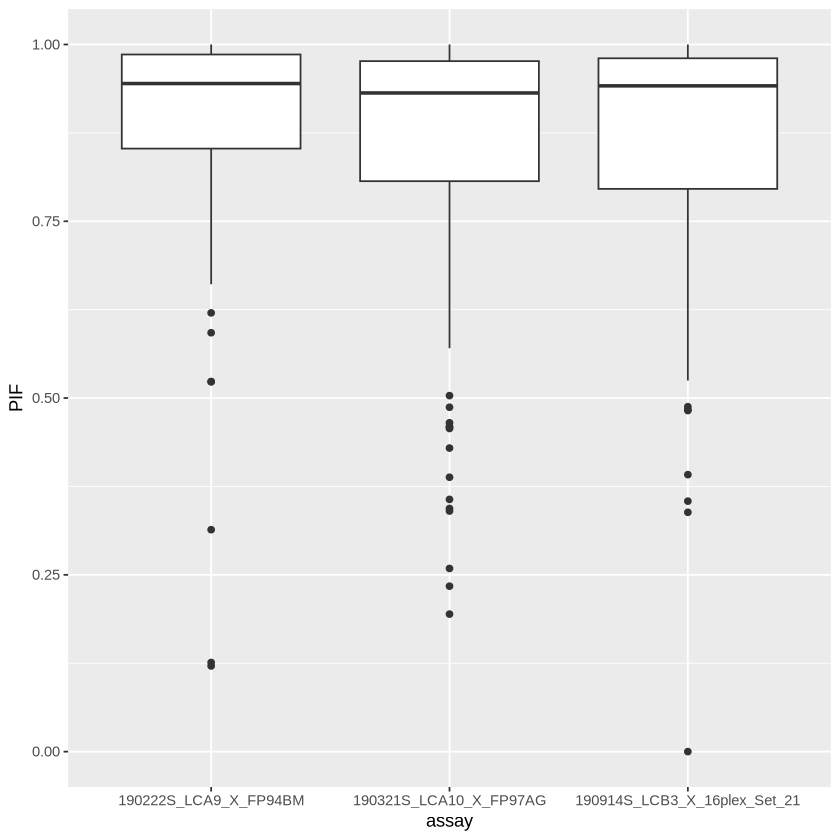

In [27]:
rd <- rbindRowData(scp1, i = 1:3)
library("ggplot2")
ggplot(data.frame(rd)) +
    aes(y = PIF,
        x = assay) +
    geom_boxplot()

Combining the metadata and the quantitative data is more challenging
since the risk of data mismatch is increased. The `QFeatures` package
therefore provides th `longFormat` function to transform a `QFeatures`
object in a long `DFrame` table. For instance, we plot the quantitative
data distribution for the first assay according to the acquisition
channel index and colour with respect to the sample type. Both pieces of
information are taken from the `colData`, so we provide them as
`colvars`.

In [28]:
lf <- longFormat(scp1[, , 1],
                 colvars = c("SampleType", "Channel"))

harmonizing input:
  removing 141 sampleMap rows not in names(experiments)
  removing 27 colData rownames not in sampleMap 'primary'



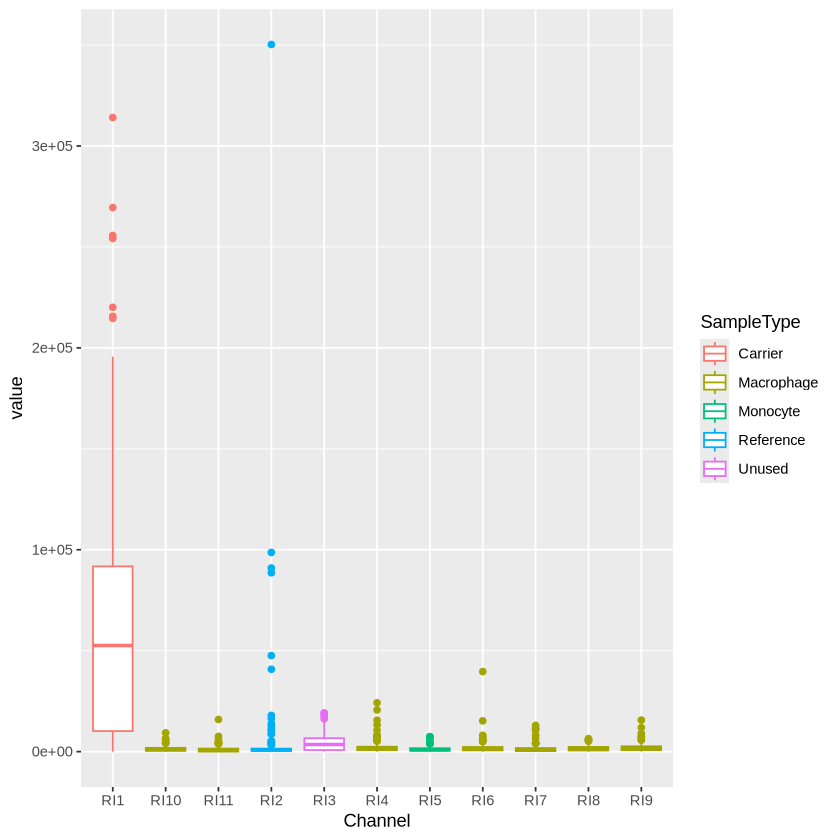

In [29]:
ggplot(data.frame(lf)) +
    aes(x = Channel,
        y = value,
        colour = SampleType) +
    geom_boxplot()

A more in-depth tutorial about data visualization from a `QFeatures`
object is provided in the `QFeautres` visualization
[vignette](https://rformassspectrometry.github.io/QFeatures/articles/Visualization.html).

# Single Cell Proteomics data processing and analysis

## The `scp` package

The `scp` package is used to process and analyse mass spectrometry
(MS)-based single cell proteomics (SCP) data. The functions rely on a
specific data structure that wraps
[`QFeatures`](https://rformassspectrometry.github.io/QFeatures/) objects
(@Gatto2023-ry) around
[`SingleCellExperiment`](http://bioconductor.org/packages/release/bioc/html/SingleCellExperiment.html)
objects (@Amezquita2019-bf). This data structure could be seen as
Matryoshka dolls were the `SingleCellExperiment` objects are small dolls
contained in the bigger `QFeatures` doll.

The `SingleCellExperiment` class provides a dedicated framework for
single-cell data. The `SingleCellExperiment` serves as an interface to
many cutting-edge methods for processing, visualizing and analysis
single-cell data. More information about the `SingleCellExperiment`
class and associated methods can be found in the [OSCA
book](http://bioconductor.org/books/release/OSCA/).

The `QFeatures` class is a data framework dedicated to manipulate and
process MS-based quantitative data. It preserves the relationship
between the different levels of information: peptide to spectrum match
(PSM) data, peptide data and protein data. The `QFeatures` package also
provides an interface to many utility functions to streamline the
processing MS data. More information about MS data analysis tools can be
found in the [RforMassSpectrometry
project](https://www.rformassspectrometry.org/).

Before running the vignette we need to load the `scp` package.

In [ ]:
#| output: false
library("scp")

Loading required package: QFeatures

Loading required package: MultiAssayExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs,

We also load `ggplot2` and `dplyr` for convenient data manipulation and
plotting.

In [ ]:
#| output: false
library("ggplot2")
library("dplyr")


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Before you start

This vignette will guide you through some common steps of mass
spectrometry-based single-cell proteomics (SCP) data analysis. SCP is an
emerging field and further research is required to develop a principled
analysis workflow. Therefore, we **do not guarantee** that the steps
presented here are the best steps for this type of data analysis. This
vignette performs the steps that were described in the SCoPE2 landmark
paper (@Specht2021-jm) and that were reproduced in another work using
the `scp` package (@Vanderaa2021-ue). The replication on the full SCoPE2
dataset using `scp` is available in [this
vignette](https://uclouvain-cbio.github.io/SCP.replication/articles/SCoPE2.html).
We hope to convince the reader that, although the workflow is probably
not optimal, `scp` has the full potential to perform standardized and
principled data analysis. All functions presented here are
comprehensively documented, highly modular, can easily be extended with
new algorithms. Suggestions, feature requests or bug reports are warmly
welcome. Feel free to open an issue in the [GitHub
repository](https://github.com/UCLouvain-CBIO/scp/issues).

This workflow can be applied to any MS-based SCP data. The minimal
requirement to follow this workflow is that the data should contain the
following information:

-   `runCol`/`Raw.file`: field in the feature data and the sample data
    that gives the names of MS acquisition runs or files.
-   `quantCols`: field in the sample data that links to columns in the
    quantification data and that allows to link samples to MS channels
    (more details in another
    [vignette](https://uclouvain-cbio.github.io/scp/articles/read_scp.html)).
-   `SampleType`: field in the sample data that provides the type of
    sample that is acquired (carrier, reference, single-cell,…). Only
    needed for multiplexing experiments.
-   `Potential.contaminant`: field in the feature data that marks
    contaminant peptides.
-   `Reverse`: field in the feature data that marks reverse peptides.
-   `PIF`: field in the feature data that provides spectral purity.
-   `PEP` or `dart_PEP`: field in the feature data that provides peptide
    posterior error probabilities.
-   `Modified.sequence`: field in the feature data that provides the
    peptide identifiers.
-   `Leading.razor.protein`: field in the feature data that provides the
    protein identifiers.
-   At least one field in the feature data that contains quantification
    values. In this case, there are 16 quantification columns named as
    `Reporter.intensity.` followed by an index (`1` to `16`).

Each required field will be described more in detail in the
corresponding sections. Names can be adapted by the user to more
meaningful ones or adapted to other output tables.

## Read in SCP data

The first step is to read in the PSM quantification table generated by,
for example, MaxQuant (@Tyanova2016-yj). We created a small example data
by subsetting the MaxQuant `evidence.txt` table provided in the SCoPE2
landmark paper (@Specht2021-jm). The `mqScpData` table is a typical
example of what you would get after reading in a CSV file using
`read.csv` or `read.table`. See `?mqScpData` for more information about
the table content.

In [3]:
data("mqScpData")

We also provide an example of a sample annotation table that provides
useful information about the samples that are present in the example
data. See `?sampleAnnotation` for more information about the table
content.

In [4]:
data("sampleAnnotation")

As a note, the example sample data contains 5 different types of samples
(`SampleType`) that can be found in a TMT-based SCP data set:

In [5]:
table(sampleAnnotation$SampleType)


     Blank    Carrier Macrophage   Monocyte  Reference     Unused 
        19          3         20          5          3         14 

-   The carrier channels (`Carrier`) contain 200 cell equivalents and
    are meant to boost the peptide identification rate.
-   The normalization channels (`Reference`) contain 5 cell equivalents
    and are used to partially correct for between-run variation.
-   The unused channels (`Unused`) are channels that are left empty due
    to isotopic cross-contamination by the carrier channel.
-   The negative control channels (`Blank`) contain samples that do not
    contain any cell but are processed as single-cell samples.
-   The single-cell sample channels contain the single-cell samples of
    interest, that are macrophage (`Macrophage`) or monocyte
    (`Monocyte`).

Using `readSCP`, we combine both tables in a `QFeatures` object
formatted as described above.

In [6]:
scp <- readSCP(assayData = mqScpData,
               colData = sampleAnnotation,
               runCol = "Raw.file",
               removeEmptyCols = TRUE)

Checking arguments.

Loading data as a 'SummarizedExperiment' object.

Splitting data in runs.

Formatting sample annotations (colData).

Formatting data as a 'QFeatures' object.



In [7]:
scp

An instance of class QFeatures containing 4 assays:
 [1] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 395 rows and 11 columns 
 [2] 190321S_LCA10_X_FP97_blank_01: SingleCellExperiment with 109 rows and 11 columns 
 [3] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 487 rows and 11 columns 
 [4] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 370 rows and 16 columns 

See here that the 3 first assays contain 11 columns that correspond to
the TMT-11 labels and the last assay contains 16 columns that correspond
to the TMT-16 labels.

**Important**: More details about the usage of `readSCP()` and how to
read your own data set are provided in the `Load data using readSCP`
[vignette](https://uclouvain-cbio.github.io/scp/articles/read_scp.html).

Another way to get an overview of the scp object is to plot the
`QFeatures` object. This will create a graph where each node is an assay
and links between assays are denoted as edges.

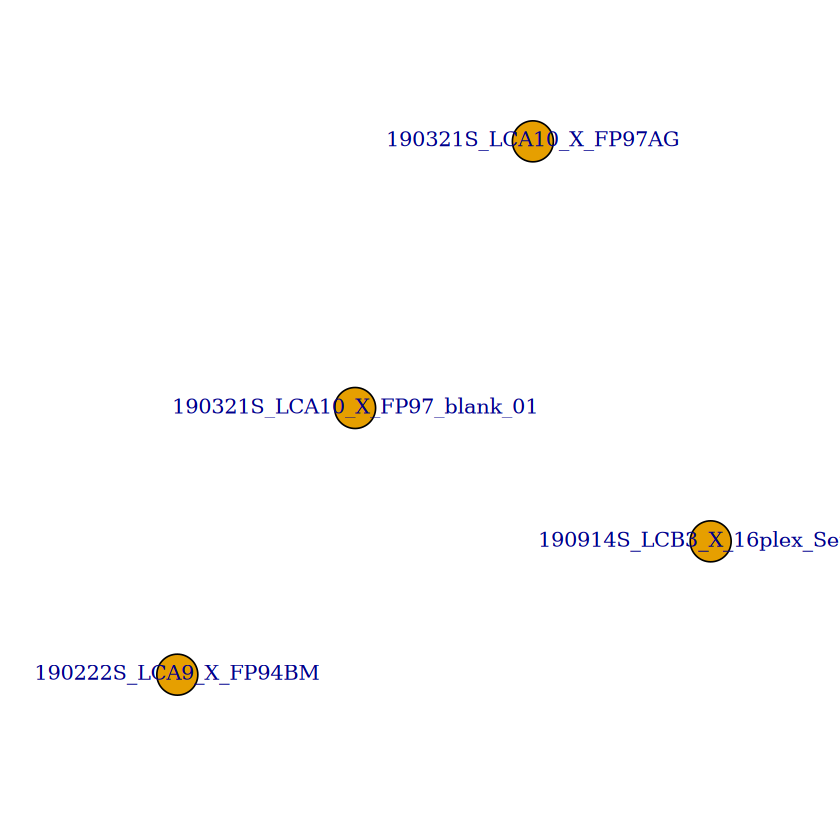

In [8]:
plot(scp)

## Quality control

### Clean missing data

All single-cell data contain many zeros. The zeros can be biological
zeros or technical zeros and differentiating between the two types is
not a trivial task. To avoid artefacts in downstream steps, we replace
the zeros by the missing value `NA`. The `zeroIsNA` function takes the
`QFeatures` object and the name(s) or index/indices of the assay(s) to
clean and automatically replaces any zero in the selected quantitative
data by `NA`.

In [9]:
scp <- zeroIsNA(scp, i = 1:4)

### Filter PSMs

A common steps in SCP is to filter out low-confidence PSMs. Each PSM
assay contains feature meta-information that are stored in the `rowData`
of the assays. The `QFeatures` package allows to quickly filter the rows
of an assay by using these information. The available variables in the
`rowData` are listed below for each assay.

In [10]:
rowDataNames(scp)

CharacterList of length 4
[["190222S_LCA9_X_FP94BM"]] uid Sequence Length ... residual participated
[["190321S_LCA10_X_FP97_blank_01"]] uid Sequence ... residual participated
[["190321S_LCA10_X_FP97AG"]] uid Sequence Length ... residual participated
[["190914S_LCB3_X_16plex_Set_21"]] uid Sequence ... residual participated

#### Filter features based on feature annotations

Below are some examples of criteria that are used to identify
low-confidence. The information is readily available since this was
computed by MaxQuant:

-   Remove PSMs that are matched to contaminants
-   Remove PSMs that are matched to the decoy database
-   Keep PSMs that exhibit a high PIF (parental ion fraction),
    indicative of the purity of a spectrum

We can perform this filtering using the `filterFeatures` function from
`QFeatures`. `filterFeatures` automatically accesses the feature
annotations and selects the rows that meet the provided condition(s).
For instance, `Reverse != "+"` keeps the rows for which the `Reverse`
variable in the `rowData` is not `"+"` (*i.e.* the PSM is not matched to
the decoy database).

In [11]:
scp <- filterFeatures(scp,
                      ~ Reverse != "+" &
                          Potential.contaminant != "+" &
                          !is.na(PIF) & PIF > 0.8)

'Reverse' found in 4 out of 4 assay(s)
'Potential.contaminant' found in 4 out of 4 assay(s)
'PIF' found in 4 out of 4 assay(s)




#### Filter assays based on detected features

To avoid proceeding with failed runs, another interesting filter is to
remove assays with too few features. If a batch contains less than, for
example, 150 features we can then suspect something wrong happened in
that batch and it should be removed. Using `dims`, we can query the
dimensions (hence the number of features and the number of samples) of
all assays contained in the dataset.

In [12]:
dims(scp)

190222S_LCA9_X_FP94BM,190321S_LCA10_X_FP97_blank_01,190321S_LCA10_X_FP97AG,190914S_LCB3_X_16plex_Set_21
283,60,318,200
11,11,11,16


Actually, a `QFeatures` object can be seen as a three-order array:
$features \times samples \times assay$. Hence, `QFeatures` supports
three-order subsetting `x[rows, columns, assays]`. We first select the
assays that have sufficient PSMs (the number of rows is greater than
150), and then subset the `scp` object for the assays that meet the
criterion.

In [13]:
keepAssay <- dims(scp)[1, ] > 150
scp <- scp[, , keepAssay]

Warning message:
“'experiments' dropped; see 'drops()'”
harmonizing input:
  removing 11 sampleMap rows not in names(experiments)
  removing 11 colData rownames not in sampleMap 'primary'



In [14]:
scp

An instance of class QFeatures containing 3 assays:
 [1] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 283 rows and 11 columns 
 [2] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 318 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 200 rows and 16 columns 

Notice the `190321S_LCA10_X_FP97_blank_01` sample was removed because it
did not contain sufficient features, as expected from a blank run. This
could also have been the case for failed runs.

#### Filter features based on SCP metrics

Another type of filtering is specific to SCP. In the SCoPE2 analysis,
the authors suggest a filters based on the sample to carrier ratio
(SCR), that is the reporter ion intensity of a single-cell sample
divided by the reporter ion intensity of the carrier channel (200 cells)
from the same batch. It is expected that the carrier intensities are
much higher than the single-cell intensities.

The SCR can be computed using the `computeSCR` function from `scp`. The
function must be told which channels are the samples that must be
divided and which channel contains the carrier. This information is
provided in the sample annotations and is accessed using the `colData`,
under the `SampleType` field.

In [15]:
table(colData(scp)[, "SampleType"])


     Blank    Carrier Macrophage   Monocyte  Reference     Unused 
         3          3         20          5          3          4 

In this dataset, `SampleType` gives the type of sample that is present
in each TMT channel. The SCoPE2 protocole includes 5 types of samples:

-   The carrier channels (`Carrier`) contain 200 cell equivalents and
    are meant to boost the peptide identification rate.
-   The normalization channels (`Reference`) contain 5 cell equivalents
    and are used to partially correct for between-run variation.
-   The unused channels (`Unused`) are channels that are left empty due
    to isotopic cross-contamination by the carrier channel.
-   The negative control channels (`Blank`) contain samples that do not
    contain any cell but are processed as single-cell samples.
-   The single-cell sample channels contain the single-cell samples of
    interest, that are macrophage (`Macrophage`) or monocyte
    (`Monocyte`).

The `computeSCR` function expects the following input:

-   The `QFeatures` dataset
-   The assay name(s) or index/indices for which the SCR should be
    computed
-   `colvar`: the variable in the sample annotations (`colData`) that
    hold the information used to discriminate sample channels from
    carrier channels.
-   `carrierPattern`: a string pattern (following regular expression
    syntax) that identifies the carrier channel in each batch.
-   `samplePattern`: a string pattern (following regular expression
    syntax) that identifies the samples to divide.

Optionally, you can also provide the following arguments:

-   `rowDataName`: the name of the column in the `rowData` where to
    store the computed SCR for each feature.
-   `sampleFUN`: when multiple samples are present in an assay, there
    are as many SCR as there are samples that need to be summarized to a
    single value per feature. `sampleFUN` tells which function to use
    for summarizing the sample values before computing the SCR; the
    default is the `mean`.
-   `carrierFUN`: some designs might include several carriers per run
    (not the case in this example). Similarly to `sampleFUN`,
    `carrierFUN` tells which function to use for summarizing the carrier
    values before computing the SCR; the default is the same function as
    `sampleFUN`.

The function creates a new field in the `rowData` of the assays. We
compute the average SCR for each PSM and store it in the corresponding
`rowData`, under the `MeanSCR` column.

In [16]:
scp <- computeSCR(scp,
                  i = 1:3,
                  colvar = "SampleType",
                  carrierPattern = "Carrier",
                  samplePattern = "Macrophage|Monocyte",
                  sampleFUN = "mean",
                  rowDataName = "MeanSCR")

Before applying the filter, we plot the distribution of the average SCR.
We collect the `rowData` from several assays in a single table
`DataFrame` using the `rbindRowData` function from `QFeatures`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 15 rows containing non-finite outside the scale range (`stat_bin()`).”


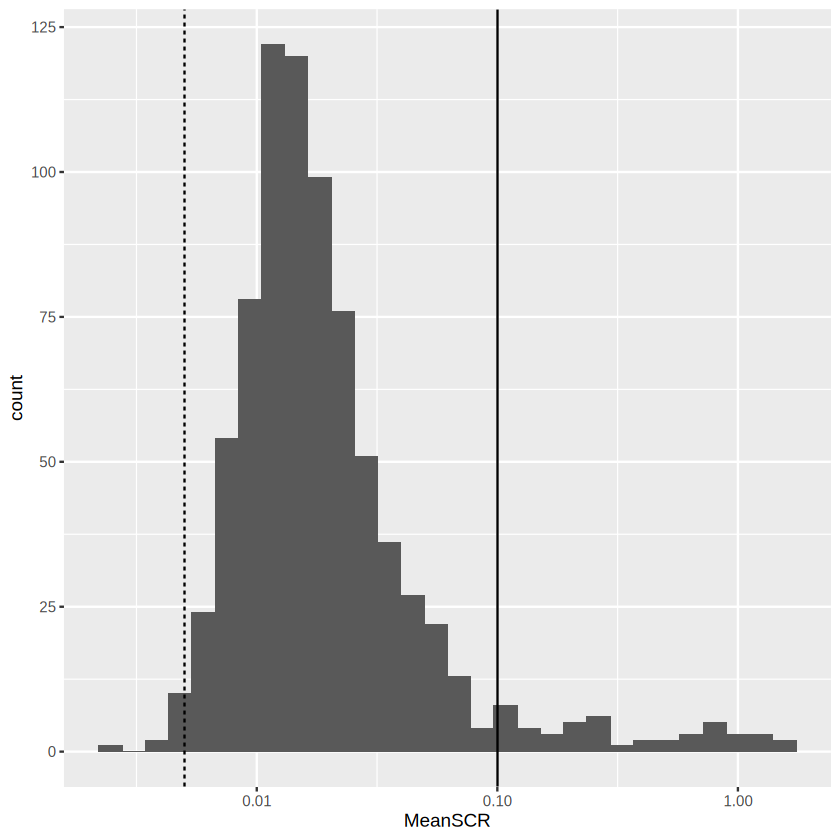

In [17]:
rbindRowData(scp, i = 1:3) |>
    data.frame() |>
    ggplot(aes(x = MeanSCR)) +
    geom_histogram() +
    geom_vline(xintercept = c(1/200, 0.1),
               lty = c(2, 1)) +
    scale_x_log10()

The expected ratio between single cells and the carrier is 1/200 (dashed
line). We can see that the distribution mode is slightly shifted towards
higher ratios with a mode around 0.01. However, there are a few PSMs
that stand out of the distribution and have a much higher signal than
expected, indicating something wrong happened during the quantification
of those PSMs. We therefore filter out PSMs with an average SCR higher
than 0.1 (solide line). This is again easily performed using the
`filterFeatures` functions.

In [18]:
scp <- filterFeatures(scp,
                      ~ !is.na(MeanSCR) &
                          MeanSCR < 0.1)

'MeanSCR' found in 3 out of 3 assay(s)




#### Filter features to control for FDR

Finally, we might also want to control for false discovery rate (FDR).
MaxQuant already computes posterior error probabilities (PEP), but
filtering on PEPs is too conservative (@Kall2008-hb) so we provide the
`pep2qvalue` function to convert PEPs to q-values that are directly
related to FDR. We here compute the q-values from the PEP (`dart_PEP`)
across all 3 assays. `dart_PEP` contains the PEP values that have been
updated using the DART-ID algorithm (@Chen2019-uc). The function will
store the results in the `rowData`, we here asked to name the new column
`qvalue_PSMs`.

In [19]:
scp <- pep2qvalue(scp,
                  i = 1:3,
                  PEP = "dart_PEP",
                  rowDataName = "qvalue_PSMs")

We also allow to compute q-values at peptide or protein level rather
than PSM. In this case, you need to supply the `groupBy` argument.
Suppose we want to compute the q-values at protein level, we can fetch
the protein information stored under `Leading.razor.protein` in the
`rowData`. This time, we store the q-values in a new field called
`qvalue_proteins`.

In [20]:
scp <- pep2qvalue(scp,
                  i = 1:3,
                  PEP = "dart_PEP",
                  groupBy = "Leading.razor.protein",
                  rowDataName = "qvalue_proteins")

We can now filter the PSM to control, let’s say, the protein FDR at 1%.
This can be performed using `filterFeatures` because the q-values were
stored in the `rowData`.

In [21]:
scp <- filterFeatures(scp,
                      ~ qvalue_proteins < 0.01)

'qvalue_proteins' found in 3 out of 3 assay(s)




## Process the PSM data

### Relative reporter ion intensity

In order to partialy correct for between-run variation, SCoPE2 suggests
computing relative reporter ion intensities. This means that intensities
measured for single-cells are divided by the reference channel
containing 5-cell equivalents. We use the `divideByReference` function
that divides channels of interest by the reference channel. Similarly to
`computeSCR`, we can point to the samples and the reference columns in
each assay using the annotation contained in the `colData`.

We here divide all columns (using the regular expression wildcard `.`)
by the reference channel (`Reference`).

In [22]:
scp <- divideByReference(scp,
                         i = 1:3,
                         colvar = "SampleType",
                         samplePattern = ".",
                         refPattern = "Reference")

## Aggregate PSM data to peptide data

Now that the PSM assays are processed, we can aggregate them to
peptides. This is performed using the `aggregateFeatures` function. For
each assay, the function aggregates several PSMs into a unique peptide.
This is best illustrated by the figure below.

Remember there currently are three assays containing the PSM data.

In [23]:
scp

An instance of class QFeatures containing 3 assays:
 [1] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 239 rows and 11 columns 
 [2] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 277 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 186 rows and 16 columns 

The PSMs are aggregated over the `fcol` feature variable, here the
modified peptide sequence. We also need to supply an aggregating
function that will tell how to combine the quantitative data of the PSMs
to aggregate. We here aggregate the PSM data using the median value per
sample thanks to the `matrixStats:colMedians()` function. Other
functions can be used and we refer to the documentation
`?aggregateFeatures` for more information about available aggregation
functions. The `aggregateFeatures()` function will create a new assay
for each aggregated assay. We name the aggregated assays using the
original names and appending `peptides_` at the start.

In [24]:
scp <- aggregateFeatures(scp,
                         i = 1:3,
                         fcol = "Modified.sequence",
                         name = paste0("peptides_", names(scp)),
                         fun = matrixStats::colMedians, na.rm = TRUE)

Your quantitative and row data contain missing values. Please read the
relevant section(s) in the aggregateFeatures manual page regarding the
effects of missing values on data aggregation.

Your quantitative and row data contain missing values. Please read the
relevant section(s) in the aggregateFeatures manual page regarding the
effects of missing values on data aggregation.

Your quantitative and row data contain missing values. Please read the
relevant section(s) in the aggregateFeatures manual page regarding the
effects of missing values on data aggregation.



Notice that 3 new assays were created in the `scp` object. Those new
assays contain the aggregated features while the three first assays are
unchanged. This allows to keep track of the data processing.

In [25]:
scp

An instance of class QFeatures containing 6 assays:
 [1] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 239 rows and 11 columns 
 [2] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 277 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 186 rows and 16 columns 
 [4] peptides_190222S_LCA9_X_FP94BM: SingleCellExperiment with 216 rows and 11 columns 
 [5] peptides_190321S_LCA10_X_FP97AG: SingleCellExperiment with 256 rows and 11 columns 
 [6] peptides_190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 168 rows and 16 columns 

Under the hood, the `QFeatures` architecture preserves the relationship
between the aggregated assays. See `?AssayLinks` for more information on
relationships between assays. This is illustrated on the `QFeatures`
plot:

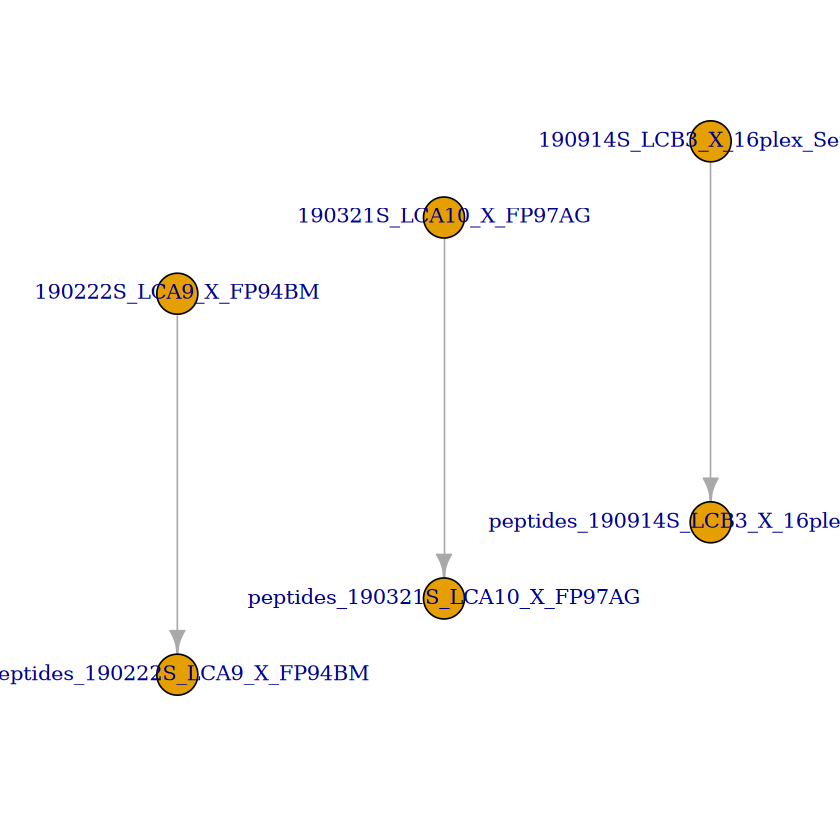

In [26]:
plot(scp)

## Join the SCoPE2 sets in one assay

Up to now, we kept the data belonging to each MS run in separate assays.
We now combine all batches into a single assay. This is done using the
`joinAssays` function from the `QFeatures` package. Note that we now use
the aggregated assays, so assay 4 to 6.

In [27]:
scp <- joinAssays(scp,
                  i = 4:6,
                  name = "peptides")

In this case, one new assay is created in the `scp` object that combines
the data from assay 4 to 6. The samples are always distinct so the
number of column in the new assay (here $48$) will always equals the sum
of the columns in the assays to join (here $16 + 16 +
16$). The feature in the joined assay might contain less features than
the sum of the rows of the assays to join since common features between
assays are joined in a single row.

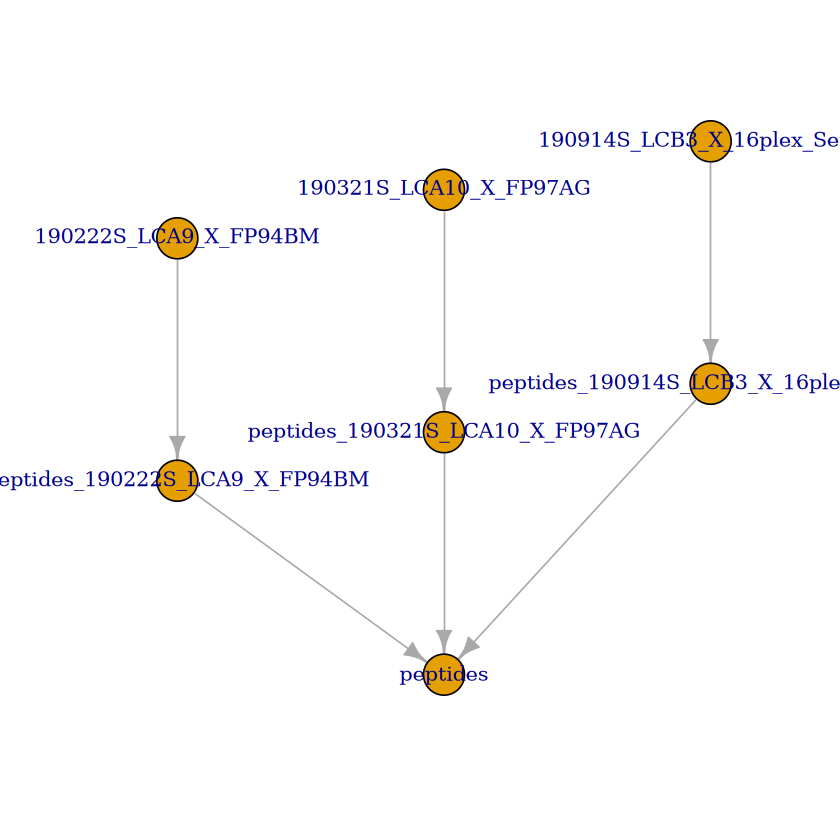

In [28]:
plot(scp)

## Filter single-cells

Another common step in single-cell data analysis pipelines is to remove
low-quality cells. After subsetting for the samples of interest, we will
use 2 metrics: the median relative intensities per cell and the median
coefficient of variation (CV) per cell.

### Filter samples of interest

We can subset the cells of interest, that is the negative control
samples, the macrophages and the monocytes. This can easily be done by
taking advantage of the `colData` and the subsetting operators. Recall
that `QFeatures` objects support three-order subsetting,
`x[rows, columns, assays]`, where columns are the samples of interest.

In [29]:
scp

An instance of class QFeatures containing 7 assays:
 [1] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 239 rows and 11 columns 
 [2] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 277 rows and 11 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 186 rows and 16 columns 
 [4] peptides_190222S_LCA9_X_FP94BM: SingleCellExperiment with 216 rows and 11 columns 
 [5] peptides_190321S_LCA10_X_FP97AG: SingleCellExperiment with 256 rows and 11 columns 
 [6] peptides_190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 168 rows and 16 columns 
 [7] peptides: SingleCellExperiment with 384 rows and 38 columns 

In [30]:
scp <- scp[, scp$SampleType %in% c("Blank", "Macrophage", "Monocyte"), ]

The subsetting removes unwanted samples from all assays. The filtered
data set contains the same number of assays with the same number of
features, but the number of columns (hence sampled) decreased.

In [31]:
scp

An instance of class QFeatures containing 7 assays:
 [1] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 239 rows and 8 columns 
 [2] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 277 rows and 8 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 186 rows and 12 columns 
 [4] peptides_190222S_LCA9_X_FP94BM: SingleCellExperiment with 216 rows and 8 columns 
 [5] peptides_190321S_LCA10_X_FP97AG: SingleCellExperiment with 256 rows and 8 columns 
 [6] peptides_190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 168 rows and 12 columns 
 [7] peptides: SingleCellExperiment with 384 rows and 28 columns 

### Filter based on the median relative intensity

We compute the median relative reporter ion intensity for each cell
separately and apply a filter based on this statistic. This procedure
recalls that of library size filtering commonly performed in scRNA-Seq
data analysis, where the library size is the sum of the counts in each
single cell. We compute and store the median intensity in the `colData`.

In [32]:
medians <- colMedians(assay(scp[["peptides"]]), na.rm = TRUE)
scp$MedianRI <- medians

Looking at the distribution of the median per cell can highlight
low-quality cells.

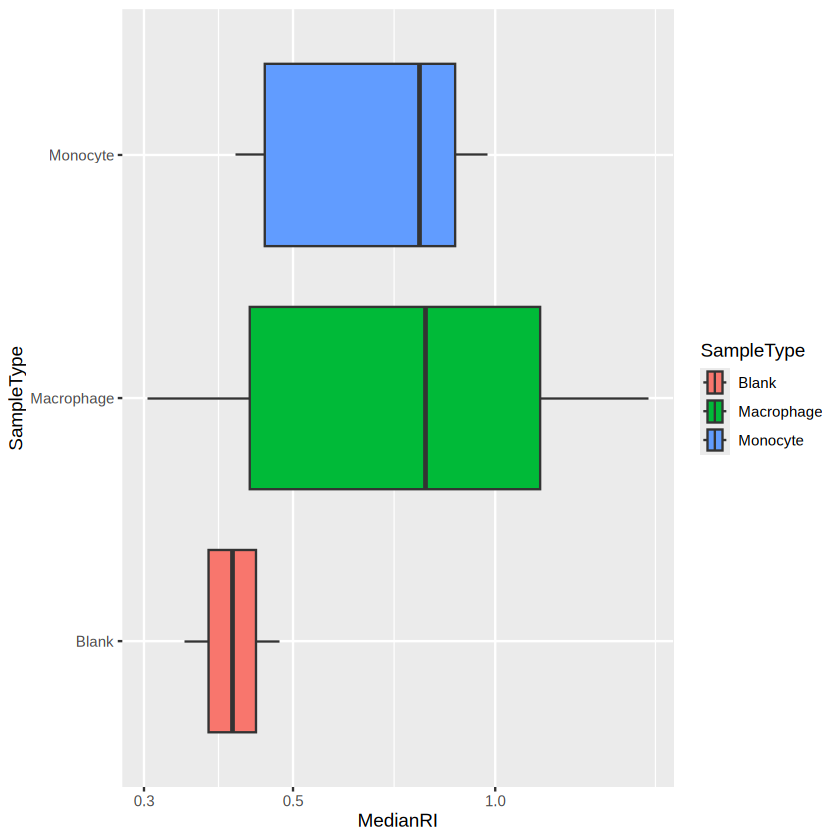

In [33]:
colData(scp) |>
    data.frame() |>
    ggplot() +
    aes(x = MedianRI,
        y = SampleType,
        fill = SampleType) +
    geom_boxplot() +
    scale_x_log10()

The negative control samples should not contain any peptide information
and are therefore used to assess the amount of background signal. The
graph above confirms that the signal measured in single-cells
(macrophages and monocytes) is above the background signal, hence no
filtering is needed. Would it not be the case, the same procedure as in
the previous section can be used for selecting the cells that have an
associated median RI lower that a defined threshold.

### Filter based on the median CV

The median CV measures the consistency of quantification for a group of
peptides that belong to a protein. We remove cells that exhibit high
median CV over the different proteins. We compute the median CV per cell
using the `computeMedianCV` function from the `scp` package. The
function takes the `peptides` assay and computes the CV for each protein
in each cell. To perform this, we must supply the name of the `rowData`
field that contains the protein information through the `groupBy`
argument. We also only want to compute CVs if we have at least 5
peptides per protein. Finally, we also perform a normalization and
divide the columns by the median. The computed median CVs are
automatically stored in the `colData` under the name that is supplied,
here `MedianCV`.

In [34]:
scp <- medianCVperCell(scp,
                       i = 1:3,
                       groupBy = "Leading.razor.protein",
                       nobs = 5,
                       norm = "div.median",
                       na.rm = TRUE,
                       colDataName = "MedianCV")

The computed CVs are stored in the `colData` of the `peptides` assay and
holds the median CV per cell computed using at least 5 observations
(peptides). The main interest of computing the median CV per cell is to
filter cells with reliable quantification. The negative control samples
are not expected to have reliable quantifications and hence can be used
to estimate an empirical null distribution of the CV. This distribution
helps defining a threshold that filters out single-cells that contain
noisy quantification.

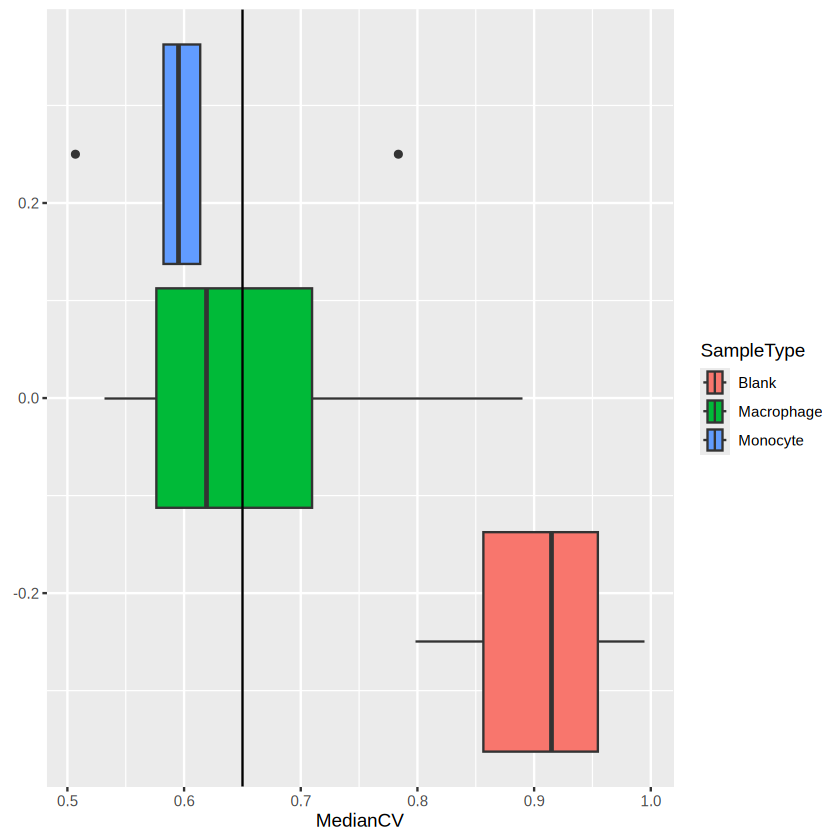

In [35]:
getWithColData(scp, "peptides") |>
    colData() |>
    data.frame() |>
    ggplot(aes(x = MedianCV,
               fill = SampleType)) +
    geom_boxplot() +
    geom_vline(xintercept = 0.65)

We can see that the protein quantification for single-cells are much
more consistent than for negative control samples. Based on the
distribution of the negative controls, we decide to keep the cells that
have a median CV lower than 0.65. Note this example is inaccurate
because the null distribution is based on only 3 negative controls, but
more sets could lead to a better estimation of the CV null distribution.

In [36]:
scp <- scp[, !is.na(scp$MedianCV) & scp$MedianCV < 0.65, ]

We can now remove the negative controls since all QC metrics are now
computed.

In [37]:
scp <- scp[, scp$SampleType != "Blank", ]

## Process the peptide data

In this vignette, the peptide data are further processed before
aggregation to proteins. The steps are: normalization, filter peptides
based on missing data and log-transformation.

### Normalization

The columns (samples) of the peptide data are first normalized by
dividing the relative intensities by the median relative intensities.
Then, the rows (peptides) are normalized by dividing the relative
intensities by the mean relative intensities. The normalized data is
stored in a separate assay. This normalization procedure is suggested in
the SCoPE2 analysis and is applied using the `sweep` method. Beside the
dataset and the assay to normalize, the method expects a `MARGIN`, that
is either row-wise (`1`) or column-wise (`2`) transformation, the `FUN`
function to apply and `STATS`, a vector of values to apply. More
conventional normalization procedure can be found in
`?QFeatures::normalize`.

In [38]:
scp <- sweep(scp,
             i = "peptides",
             MARGIN = 2,
             FUN = "/",
             STATS = colMedians(assay(scp[["peptides"]]), na.rm = TRUE),
             name = "peptides_norm_col")

In [39]:
scp <- sweep(scp,
             i = "peptides_norm_col",
             MARGIN = 1,
             FUN = "/",
             STATS = rowMeans(assay(scp[["peptides_norm_col"]]),  na.rm = TRUE),
             name = "peptides_norm")

Notice each call to `sweep` created a new assay. Let’s have a look to
the current stat of the `QFeatures` plot:

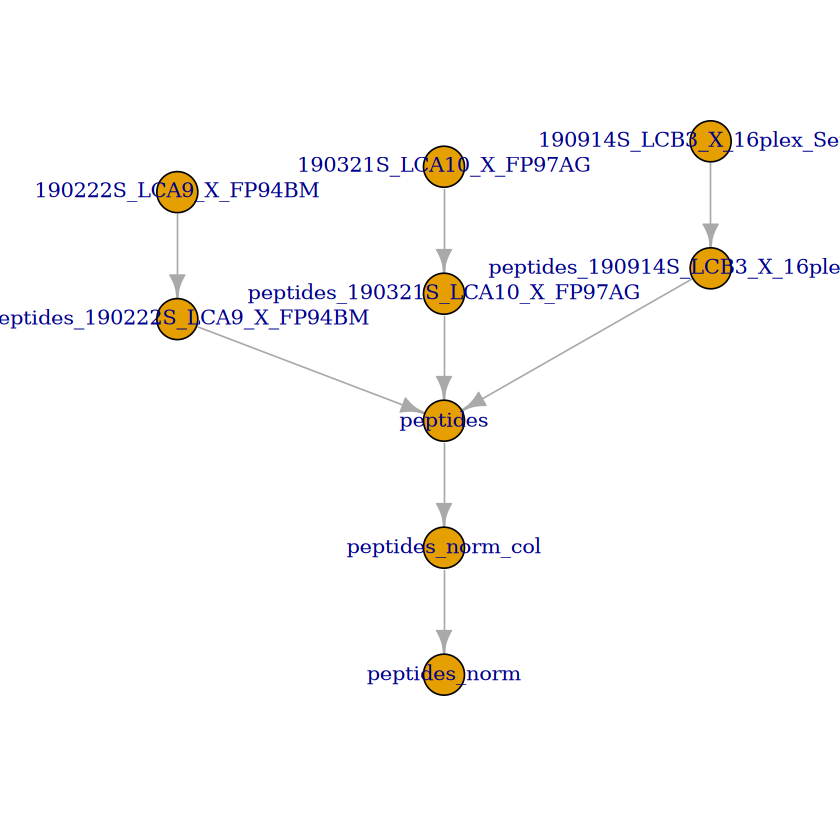

In [40]:
plot(scp)

### Remove peptides with high missing rate

Peptides that contain many missing values are not informative.
Therefore, another common procedure is to remove higly missing data. In
this example, we remove peptides with more than 99 % missing data. This
is done using the `filterNA` function from `QFeatures`.

In [41]:
scp <- filterNA(scp,
                i = "peptides_norm",
                pNA = 0.99)

### Log-transformation

In this vignette, we perform log2-transformation using the
`logTransform` method from `QFeatures`. Other log-transformation can be
applied by changing the `base` argument.

In [42]:
scp <- logTransform(scp,
                    base = 2,
                    i = "peptides_norm",
                    name = "peptides_log")

Similarly to `sweep`, `logTransform` creates a new assay in `scp`.

## Aggregate peptide data to protein data

Similarly to aggregating PSM data to peptide data, we can aggregate
peptide data to protein data using the `aggregateFeatures` function.

In [43]:
scp <- aggregateFeatures(scp,
                         i = "peptides_log",
                         name = "proteins",
                         fcol = "Leading.razor.protein",
                         fun = matrixStats::colMedians, na.rm = TRUE)

Your quantitative and row data contain missing values. Please read the
relevant section(s) in the aggregateFeatures manual page regarding the
effects of missing values on data aggregation.



In [44]:
scp

An instance of class QFeatures containing 11 assays:
 [1] 190222S_LCA9_X_FP94BM: SingleCellExperiment with 239 rows and 6 columns 
 [2] 190321S_LCA10_X_FP97AG: SingleCellExperiment with 277 rows and 6 columns 
 [3] 190914S_LCB3_X_16plex_Set_21: SingleCellExperiment with 186 rows and 6 columns 
 ...
 [9] peptides_norm: SingleCellExperiment with 373 rows and 18 columns 
 [10] peptides_log: SingleCellExperiment with 373 rows and 18 columns 
 [11] proteins: SingleCellExperiment with 94 rows and 18 columns 

After the second aggregation, the `proteins` assay in this example
contains quantitative information for 89 proteins in 15 single-cells.

## Process the protein data

The protein data is further processed in three steps: normalization,
imputation (using the KNN algorithm) and batch correction (using the
`ComBat` algorithm).

### Normalization

Normalization is performed similarly to peptide normalization. We use
the same functions, but since the data were log-transformed at the
peptide level, we subtract by the statistic (median or mean) instead of
dividing.

In [45]:
## Center columns with median
scp <- sweep(scp, i = "proteins",
             MARGIN = 2,
             FUN = "-",
             STATS = colMedians(assay(scp[["proteins"]]),
                                na.rm = TRUE),
             name = "proteins_norm_col")

In [46]:
## Center rows with mean
scp <- sweep(scp, i = "proteins_norm_col",
             MARGIN = 1,
             FUN = "-",
             STATS = rowMeans(assay(scp[["proteins_norm_col"]]),
                              na.rm = TRUE),
             name = "proteins_norm")

### Imputation

The protein data contains a lot of missing values.

In [47]:
scp[["proteins_norm"]] |>
    assay() |>
    is.na() |>
    mean()

[1] 0.3291962

The average missingness in the `proteins` assay is around 25 %.
Including more samples and hence more batches can increase the
missingness up to 70 % as seen for the complete SCoPE2 dataset
(@Specht2021-jm). Whether imputation is beneficial or deleterious for
the data will not be discussed in this vignette. But taking those
missing value into account is essential to avoid artefacts in downstream
analyses. The data imputation is performed using the K nearest neighbors
algorithm, with k = 3. This is available from the `impute()` mehtod.
More details about the arguments can be found in `?impute::impute.knn`.

In [48]:
scp <- impute(scp,
              i = "proteins_norm",
              name = "proteins_imptd",
              method = "knn",
              k = 3, rowmax = 1, colmax= 1,
              maxp = Inf, rng.seed = 1234)

Loading required namespace: impute

Imputing along margin 1 (features/rows).



Note that after imputation, no value are missing.

In [49]:
scp[["proteins_imptd"]] |>
    assay() |>
    is.na() |>
    mean()

[1] 0

### Batch correction

A very important step for processing SCP data is to correct for batch
effects. Batch effects are caused by technical variation occurring
during different MS runs. Since only a small number of single-cells can
be acquired at once, batch effects are unavoidable.

The `ComBat()` function from the `sva` package can be used to perform
batch correction as it is performed in the SCoPE2 analysis. We do not
claim that `ComBat` is the best algorithm for batch correcting SCP data
and other batch correcting methods could be used using the same
procedure.

We first extract the assay to process.

In [50]:
sce <- getWithColData(scp, "proteins_imptd")

Next, we need to provide a design matrix and the batch annotation to
`Combat`. The design matrix allows to protect variables of interest, in
our case `SampleType`.

In [51]:
batch <- sce$runCol
model <- model.matrix(~ SampleType, data = colData(sce))

We then load and call `ComBat` and overwrite the data matrix. Recall the
data matrix can be accessed using the `assay` function.

In [52]:
library(sva)
assay(sce) <- ComBat(dat = assay(sce),
                     batch = batch,
                     mod = model)

Loading required package: mgcv

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


The following object is masked from ‘package:IRanges’:

    collapse


This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.

Loading required package: genefilter


Attaching package: ‘genefilter’


The following objects are masked from ‘package:MatrixGenerics’:

    rowSds, rowVars


The following objects are masked from ‘package:matrixStats’:

    rowSds, rowVars


Loading required package: BiocParallel

Found3batches

Adjusting for1covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




Finally, we add the batch corrected assay to the `QFeatures` object and
create the feature links.

In [53]:
scp <- addAssay(scp,
                y = sce,
                name = "proteins_batchC")

In [54]:
scp <- addAssayLinkOneToOne(scp,
                            from = "proteins_imptd",
                            to = "proteins_batchC")

For the last time, we plot the overview of the fully processed data set:

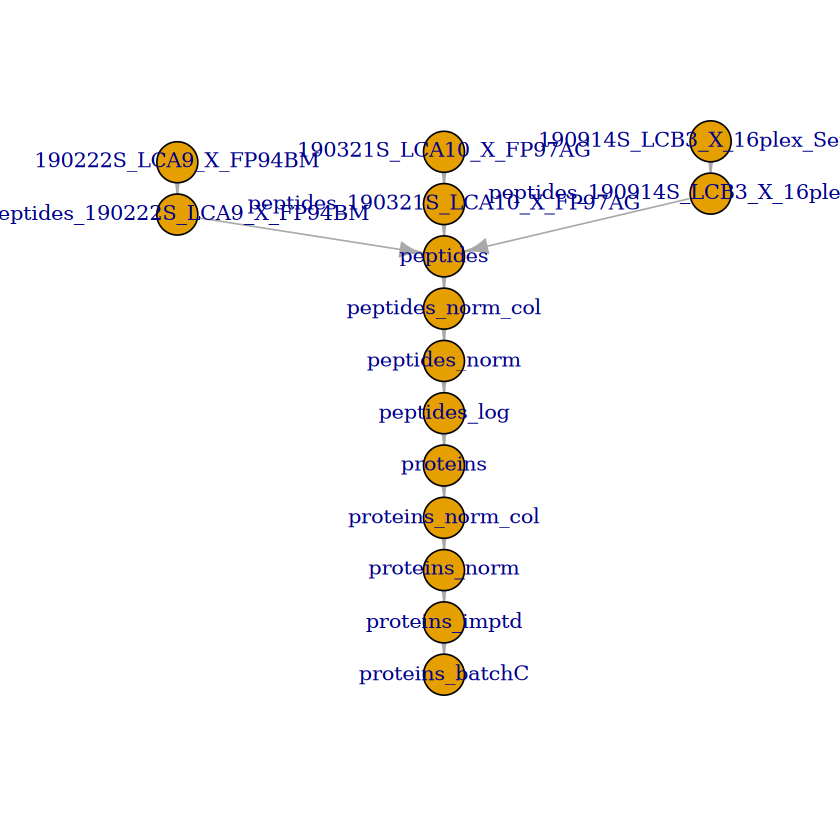

In [55]:
plot(scp)

## Dimension reduction

Because each assay contains `SingelCellExperiment` objects, we can
easily apply methods developed in the scRNA-Seq field. A useful package
for dimension reduction on single-cell data is the `scater`.

In [56]:
library(scater)

Loading required package: SingleCellExperiment

Loading required package: scuttle



This package provides streamline functions to computes various dimension
reduction such as PCA, UMAP, t-SNE, NMF, MDS, ….

### PCA

PCA can be computed using the `runPCA` method. It returns a
`SingleCellExperiment` object for which the dimension reduction results
are stored in the `reducedDim` slot.

In [57]:
scp[["proteins_batchC"]] <- runPCA(scp[["proteins_batchC"]],
                                   ncomponents = 5,
                                   ntop = Inf,
                                   scale = TRUE,
                                   exprs_values = 1,
                                   name = "PCA")

The computed PCA can be displayed using the `plotReducedDim` function.
The `dimred` arguments should give the name of the dimension reduction
results to plot, here we called it `PCA`. The samples are colored by
type of sample.

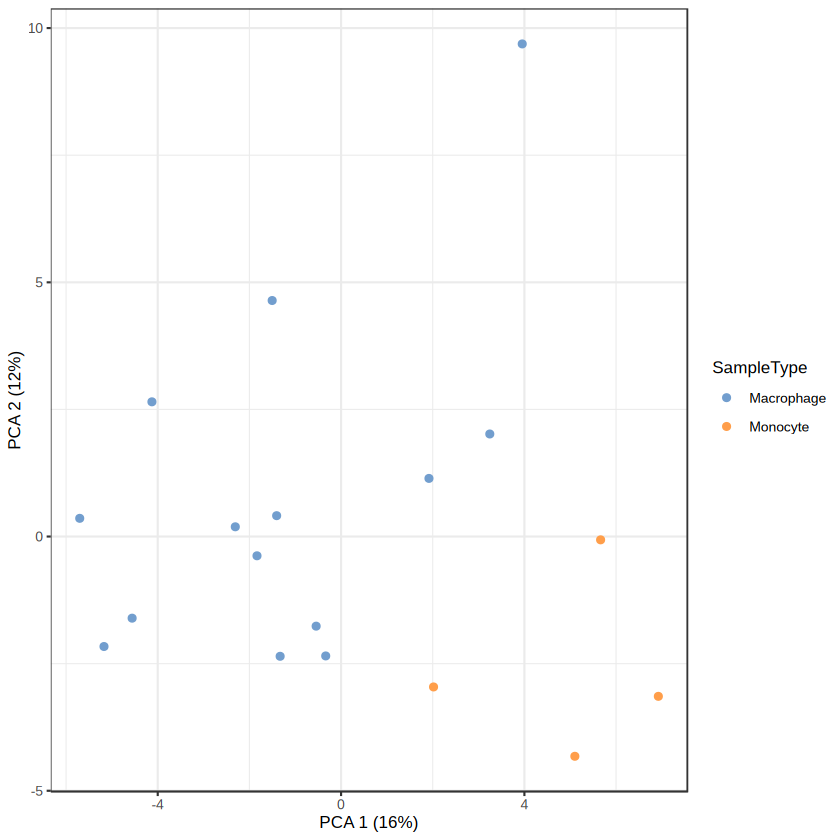

In [58]:
plotReducedDim(scp[["proteins_batchC"]],
               dimred = "PCA",
               colour_by = "SampleType",
               point_alpha = 1)

This is a minimalistic example with only a few plotted cells, but the
original SCoPE2 dataset contained more than thousand cells.

### UMAP

Similarly to PCA, we can compute a UMAP using the `runUMAP` method. Note
however that the UMAP implementation requires a initialization, usually
provided by PCA. The previous PCA results are used automatically when
supplying `dimred = "PCA"` (`PCA` is the name of the dimension reduction
result that we supplied in the previous section).

In [59]:
scp[["proteins_batchC"]] <- runUMAP(scp[["proteins_batchC"]],
                                    ncomponents = 2,
                                    ntop = Inf,
                                    scale = TRUE,
                                    exprs_values = 1,
                                    n_neighbors = 3,
                                    dimred = "PCA",
                                    name = "UMAP")

The computed UMAP can be displayed using the `plotReducedDim` function.
The `dimred` arguments gives the name of the dimension reduction results
to plot, here we called it `UMAP`. The samples are colored by type of
sample.

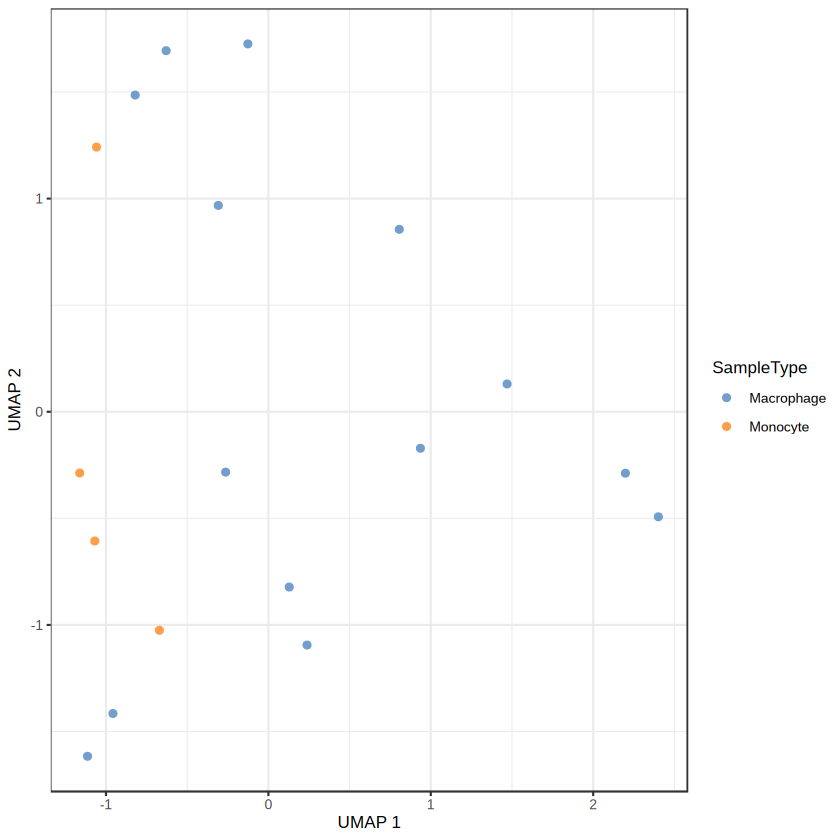

In [60]:
plotReducedDim(scp[["proteins_batchC"]],
               dimred = "UMAP",
               colour_by = "SampleType",
               point_alpha = 1)

The UMAP plot is a very interesting plot for large datasets. A UMAP on
this small example dataset is not useful but is shown for illustration.

## Monitoring data processing

`QFeatures` keeps the links between the different assays along the
processing of the data. This greatly facilitates the visualization of
the quantitative data for a features at the different processing levels.
For instance, suppose we are interested in the protein *Plastin-2*
(protein ID is `P13796`). A useful QC is to monitor the data processing
at the PSM, peptide and protein level. This can easily be done thanks to
the `QFeatures` framework. Using the `subsetByFeature`, we can extract
the protein of interest and its related features in the other assays.
The data is formatted to a long format table that can easily be plugged
in the `ggplot2` visualization tool.

Warning message:
“Removed 838 rows containing missing values or values outside the scale range
(`geom_point()`).”


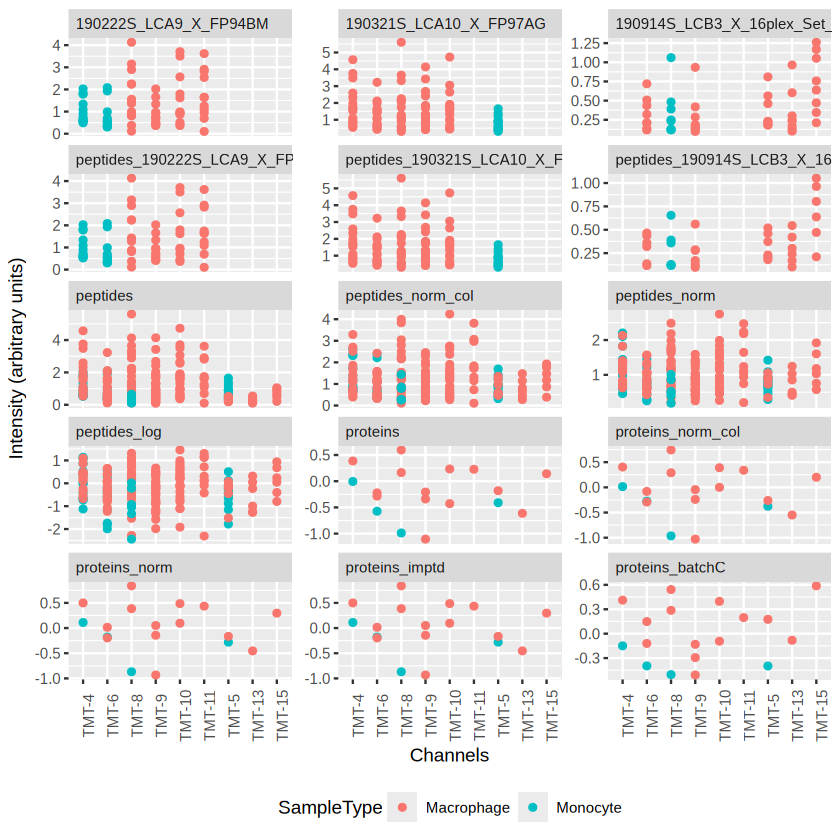

In [61]:
## Get the features related to Plastin-2 (P13796)
subsetByFeature(scp, "P13796") |>
    ## Format the `QFeatures` to a long format table
    longFormat(colvars = c("runCol", "SampleType", "quantCols")) |>
    data.frame() |>
    ## This is used to preserve ordering of the samples and assays in ggplot2
    mutate(assay = factor(assay, levels = names(scp)),
           Channel = sub("Reporter.intensity.", "TMT-", quantCols),
           Channel = factor(Channel, levels = unique(Channel))) |>
    ## Start plotting
    ggplot(aes(x = Channel, y = value, group = rowname, col = SampleType)) +
    geom_point() +
    ## Plot every assay in a separate facet
    facet_wrap(facets = vars(assay), scales = "free_y", ncol = 3) +
    ## Annotate plot
    xlab("Channels") +
    ylab("Intensity (arbitrary units)") +
    ## Improve plot aspect
    theme(axis.text.x = element_text(angle = 90),
          strip.text = element_text(hjust = 0),
          legend.position = "bottom")

# Session information

In [62]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-conda-linux-gnu
Running under: AlmaLinux 9.4 (Seafoam Ocelot)

Matrix products: default
BLAS/LAPACK: /faststorage/project/HDSSandbox/Workspaces/samuele/ABC14/ABC14-SCProteomics/.pixi/envs/default/lib/libopenblasp-r0.3.29.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.utf-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.utf-8        LC_COLLATE=en_US.utf-8    
 [5] LC_MONETARY=en_US.utf-8    LC_MESSAGES=en_US.utf-8   
 [7] LC_PAPER=en_US.utf-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.utf-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] scater_1.34.0               scuttle_1.16.0             
 [3] SingleCellExperiment_1.28.0 sva_3.54.0                 
 [5] BiocParallel_1.40

# License

This vignette is distributed under a [CC BY-SA
license](https://creativecommons.org/licenses/by-sa/2.0/) license.